# Code by : Ahmed Mohamed Ceif El Nasr
# Group: 1 Alex

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [195]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [196]:
X=np.linspace(0, 20)
Y=(-1*X)+2


#### Plot your data points. 

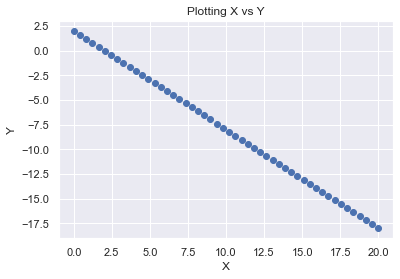

In [197]:
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plotting X vs Y")
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

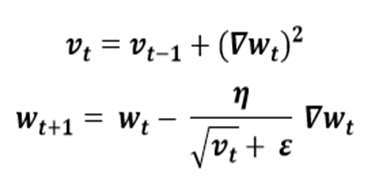

In [198]:
def Adagrad(X,Y,alpha,epochs,eps):
    theta0=theta1=0.0
    m=len(X)
    allpredictions=[]
    thetas0=[]
    thetas1=[]
    losses=np.array([])
    accum_grad0=accum_grad1=0.0
    e=1e-8
    for i in range(epochs):
        # for every epoch list all the losses and predictions
        y_pred=theta0+theta1*X
        allpredictions.append(y_pred)
        thetas0.append(theta0)
        thetas1.append(theta1)
        losses=np.append(losses,np.sum((y_pred-Y)**2)/(2*m))
        grad0=np.sum((y_pred-Y))/m
        grad1=np.sum((y_pred-Y)@X)/m
        grad=[grad0,grad1]
        accum_grad0+=(grad0)**2
        accum_grad1+=(grad1)**2

        theta0=theta0-(alpha/np.sqrt(accum_grad0+e))*grad0
        theta1=theta1-(alpha/np.sqrt(accum_grad1+e))*grad1
        if np.linalg.norm(grad)<=eps:
            return thetas0,thetas1,losses,allpredictions,theta0,theta1
    return thetas0,thetas1,losses,allpredictions,theta0,theta1

In [199]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=Adagrad(X,Y,0.1,30000,1e-3)
adagrad_pred=allpredictions[-1]
theta0,theta1

(1.9970433867701682, -0.9997752723073076)

# R2_Score

In [200]:
r2_score(Y,allpredictions[-1])

0.9999999348609585

# plot losses vs epochs

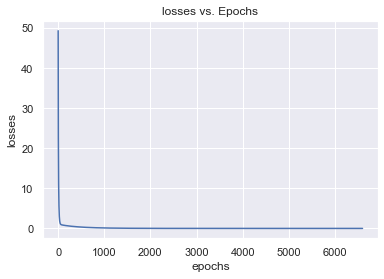

In [201]:
epochs=list(range(len(losses)))
plt.plot(epochs,losses)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.title("losses vs. Epochs")
plt.show()

# plot all regression lines

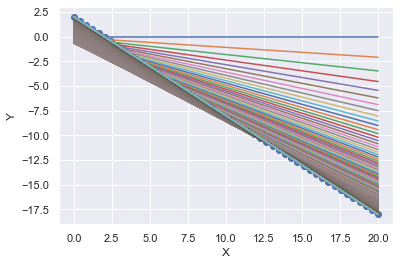

In [202]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# plot the optimal fitted line

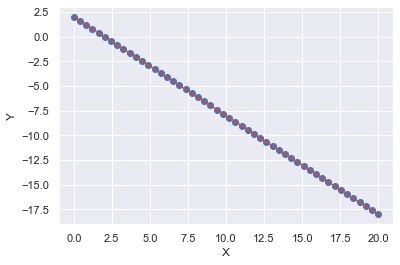

In [203]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y');

# losses vs thetas

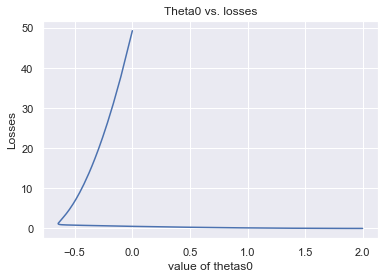

In [204]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title("Theta0 vs. losses")
plt.show()

Text(0.5, 1.0, 'Theta1 vs. losses')

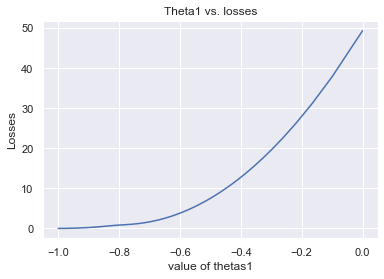

In [205]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title("Theta1 vs. losses")

# Trying Different Hyperparameters

In [206]:
# alpha to 0.001
thetas0,thetas1,losses,allpredictions,theta0,theta1=Adagrad(X,Y,0.001,30000,1e-3)
r2_score(Y,allpredictions[-1])

-0.05944699630208161

## not a sutibale value Try another Value

In [207]:
# alpha to 0.01
thetas0,thetas1,losses,allpredictions,theta0,theta1=Adagrad(X,Y,0.01,30000,1e-3)
r2_score(Y,allpredictions[-1])

0.9755057210696754

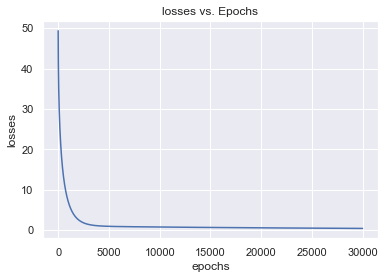

In [208]:
epochs=list(range(len(losses)))
plt.plot(epochs,losses)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.title("losses vs. Epochs")
plt.show()

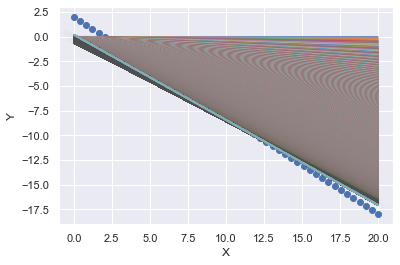

In [209]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

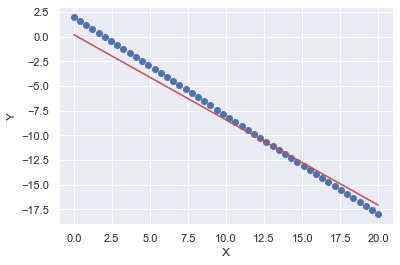

In [210]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y');

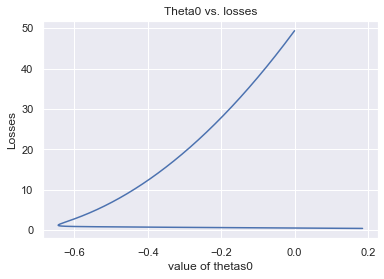

In [211]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title("Theta0 vs. losses")
plt.show()

Text(0.5, 1.0, 'Theta1 vs. losses')

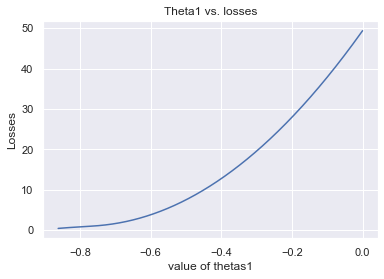

In [212]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title("Theta1 vs. losses")

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

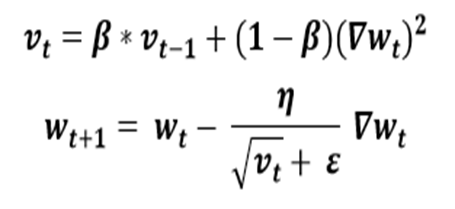

In [213]:
def RMSProp(X,Y,alpha,epochs,eps,gamma):
    theta0=theta1=0.0
    m=len(X)
    allpredictions=[]
    thetas0=[]
    thetas1=[]
    losses=np.array([])
    E_grad0=E_grad1=0.0
    e=1e-8
    for i in range(epochs):
        # for every epoch list all the losses and predictions
        y_pred=theta0+theta1*X
        allpredictions.append(y_pred)
        thetas0.append(theta0)
        thetas1.append(theta1)
        losses=np.append(losses,np.sum((y_pred-Y)**2)/(2*m))
        grad0=np.sum((y_pred-Y))/m
        grad1=np.sum((y_pred-Y)@X)/m
        grad=[grad0,grad1]
        E_grad0=E_grad0*gamma+0.1*(grad0**2)
        E_grad1=E_grad1*gamma+0.1*(grad1*2)

        theta0=theta0-(alpha/np.sqrt(E_grad0+e))*grad0
        theta1=theta1-(alpha/np.sqrt(E_grad1+e))*grad1
        if np.linalg.norm(grad)<=eps:
            return thetas0,thetas1,losses,allpredictions,theta0,theta1
    return thetas0,thetas1,losses,allpredictions,theta0,theta1

In [214]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=RMSProp(X,Y,0.001,10000,1e-3,0.9)
rmsprop_pred=allpredictions[-1]

# R2_score

In [215]:
r2_score(Y,allpredictions[-1])

0.9999999884578626

# plot losses vs epochs

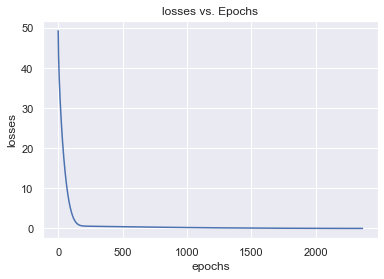

In [216]:
epochs=list(range(len(losses)))

plt.plot(epochs,losses)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.title("losses vs. Epochs")
plt.show()

# plot all regression lines

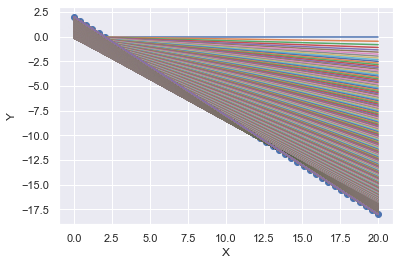

In [217]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# plot the optimal fitted line

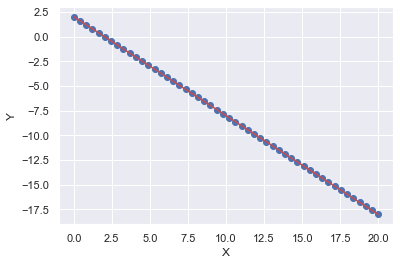

In [218]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# losses vs thetas

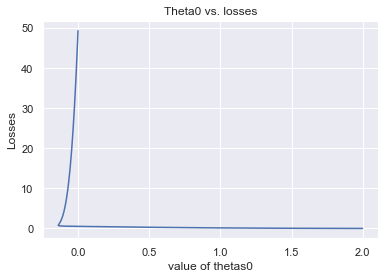

In [219]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title("Theta0 vs. losses");

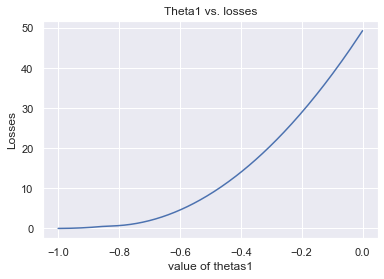

In [220]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title("Theta1 vs. losses");

# Trying Different Hyperparameters

In [221]:
#beta to 0.01 alpha 0.001
thetas0,thetas1,losses,allpredictions,theta0,theta1=RMSProp(X,Y,0.001,10000,1e-3,0.01)
#r2_score(Y,allpredictions[-1])

<ipython-input-213-d350899ee509>:24: RuntimeWarning: invalid value encountered in sqrt
  theta1=theta1-(alpha/np.sqrt(E_grad1+e))*grad1


## Notice when we reduced the beta value or we pick a random value it gave an error in the sqrt root for the optimal value is 0.9

In [222]:
# beta to 0.5
thetas0,thetas1,losses,allpredictions,theta0,theta1=RMSProp(X,Y,0.001,10000,1e-3,0.5)
r2_score(Y,allpredictions[-1])


0.9999999971889676

#### no diffrence so we can choose it to be 0.5 but 0.9 gave more accuracy

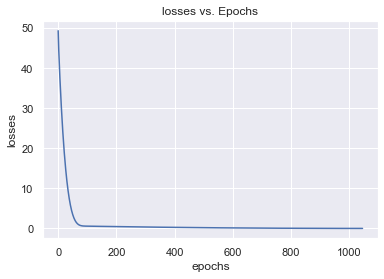

In [223]:
epochs=list(range(len(losses)))
plt.plot(epochs,losses)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.title("losses vs. Epochs")
plt.show()

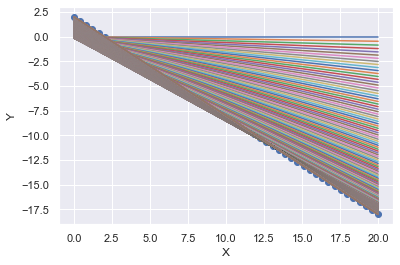

In [224]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

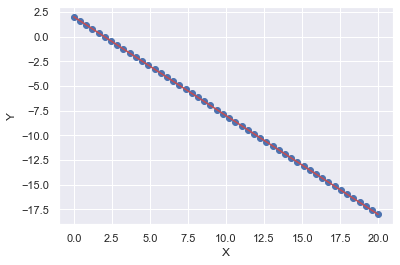

In [225]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

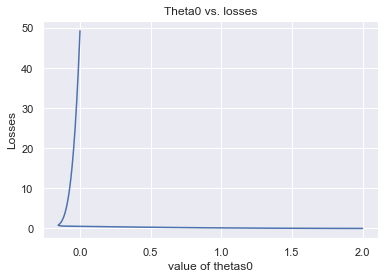

In [226]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title("Theta0 vs. losses");

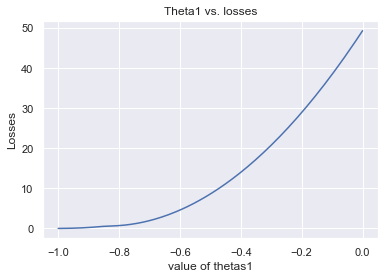

In [227]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title("Theta1 vs. losses");

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

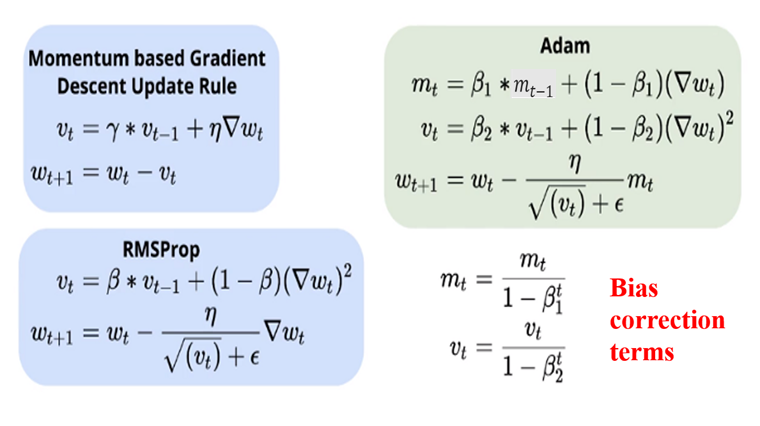

In [228]:
def ADAM(X,Y,alpha,epochs,eps,beta1,beta2):
    theta0=theta1=0.0
    m=len(X)
    allpredictions=[]
    thetas0=[]
    thetas1=[]
    losses=np.array([])
    mt1=mt0=vt0=vt1=mt_0=mt_1=vt_0=vt_1=0.0
    e=1e-8
    for i in range(epochs):
        # for every epoch list all the losses and predictions
        y_pred=theta0+theta1*X
        allpredictions.append(y_pred)
        thetas0.append(theta0)
        thetas1.append(theta1)
        losses=np.append(losses,np.sum((y_pred-Y)**2)/(2*m))
        grad0=np.sum((y_pred-Y))/m
        grad1=np.sum((y_pred-Y)@X)/m
        grad=[grad0,grad1]
        # decaying averages of past gradients
        mt_0=mt_0*beta1+(1-beta1)*grad0
        mt_1=mt_1*beta1+(1-beta1)*grad1
        # decaying averages of past squared gradients
        vt_0=beta2*vt_0+(1-beta2)*(grad0**2)
        vt_1=beta2*vt_1+(1-beta2)*(grad1**2)
        # bias-corrected first moment
        mt0=mt_0/(1-beta1)
        mt1=mt_1/(1-beta1)
        # bias-corrected second moment
        vt0=vt_0/(1-beta2)
        vt1=vt_1/(1-beta2)
        # update theta0 and theta1 
        theta0=theta0-(alpha/(np.sqrt(vt0)+e))*mt0
        theta1=theta1-(alpha/(np.sqrt(vt1)+e))*mt1
        # Stop condition
        if np.linalg.norm(grad)<=eps:
            return thetas0,thetas1,losses,allpredictions,theta0,theta1
    return thetas0,thetas1,losses,allpredictions,theta0,theta1

In [229]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=ADAM(X,Y,0.01,100000,1e-3,0.9,0.999)
adam_pred=allpredictions[-1]

# R2_score

In [230]:
r2_score(Y,allpredictions[-1])

0.9999999332587847

# plot losses vs epochs

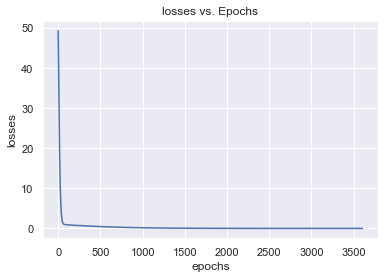

In [231]:
epochs=list(range(len(losses)))
plt.plot(epochs,losses)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.title("losses vs. Epochs")
plt.show()

# plot all regression lines

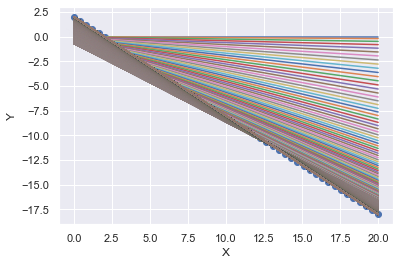

In [232]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# plot the optimal fitted line

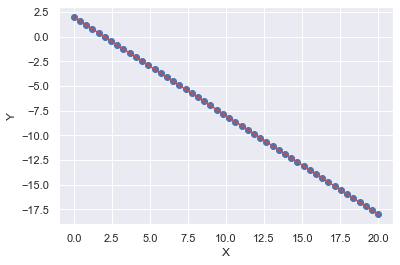

In [233]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# losses vs thetas

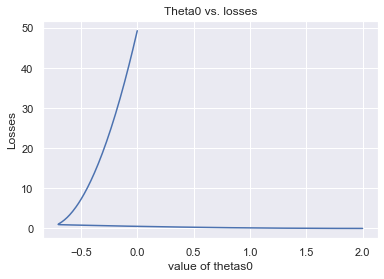

In [234]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title("Theta0 vs. losses")
plt.show()

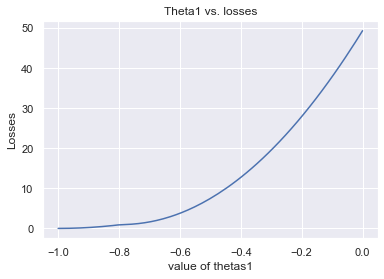

In [235]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title("Theta1 vs. losses")
plt.show()

# Trying diffirent Hyperprameter

In [236]:
# tring beta1 with small value and beta2 with high value and alpha with very small value and observ the r2score
thetas0,thetas1,losses,allpredictions,theta0,theta1=ADAM(X,Y,0.0001,100000,1e-3,0.1,0.999)
r2_score(Y,allpredictions[-1])

0.09674541811581361

### We notice that decreasing the alpha leading to r2_score with negative values which is bad for the algorithm

# Try a different values

In [237]:
# tring beta1 with s0.5 and beta2 with 0.9 and alpha with 0.001 
thetas0,thetas1,losses,allpredictions,theta0,theta1=ADAM(X,Y,0.001,100000,1e-3,0.5,0.9)
r2_score(Y,allpredictions[-1])


0.999999999839156

### We notice that decreasing the alpha and adjusting beta1 and beta 2 leading to r2_score with better performance values which is good for the algorithm

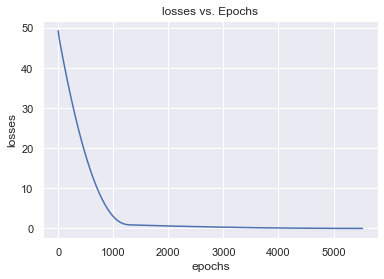

In [238]:
epochs=list(range(len(losses)))
plt.plot(epochs,losses)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.title("losses vs. Epochs")
plt.show()

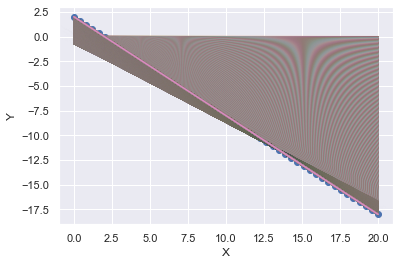

In [239]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

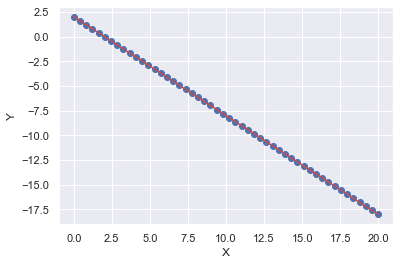

In [240]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

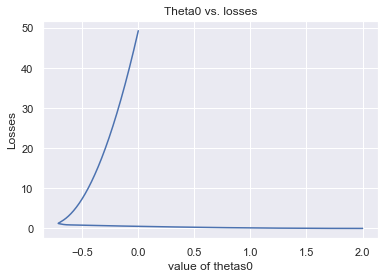

In [241]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title("Theta0 vs. losses");

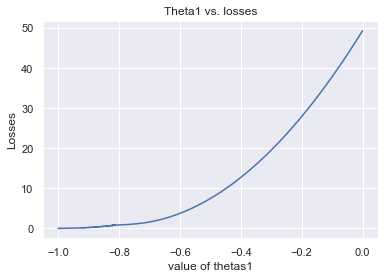

In [242]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title("Theta1 vs. losses");

# Ploting ADAGRAD, RMSProp and ADAM

### Using the same values for alpha, iterations, beta and beta2 and notice the difference

In [243]:
thetas0,thetas1,losses,allpredictions_adagrad,theta0,theta1=Adagrad(X,Y,0.001,10000,1e-3)
adagrad_pred=allpredictions_adagrad[-1]

In [244]:
thetas0,thetas1,losses,allpredictions_rms,theta0,theta1=RMSProp(X,Y,0.001,10000,1e-3,0.9)
rmsprop_pred=allpredictions_rms[-1]

In [245]:
thetas0,thetas1,losses,allpredictions_adam,theta0,theta1=ADAM(X,Y,0.001,10000,1e-3,0.9,0.999)
adam_pred=allpredictions_adam[-1]

R2_score: 
Adagrad -0.6663499812826343
Rmsprop 0.9999999884578626
Adam 0.9934174390795498


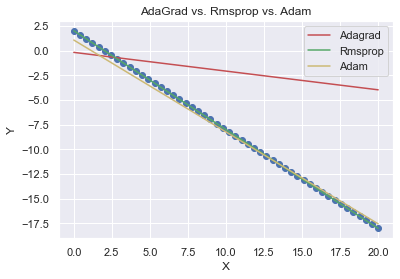

In [246]:
plt.scatter(X,Y)
plt.plot(X,adagrad_pred,color='r')
plt.plot(X,rmsprop_pred,color='g')
plt.plot(X,adam_pred,color='y')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["Adagrad","Rmsprop","Adam"])
plt.title("AdaGrad vs. Rmsprop vs. Adam");
print("R2_score: ")
print("Adagrad",r2_score(Y,allpredictions_adagrad[-1]))
print("Rmsprop",r2_score(Y,allpredictions_rms[-1]))
print("Adam",r2_score(Y,allpredictions_adam[-1]))

## We Notice that the 3 algorithms will have different R2_Value when setting the same alpha and we notice that for Adagrad the optimal prediction value is not good as when the alpha value was 0.1 so the accuracy for the 3 algorithms depends a lot on the alpha, beta1 and beta 2 parameters

## Adagrad Fixed Values

In [248]:
thetas0,thetas1,losses,allpredictions_adagrad,theta0,theta1=Adagrad(X,Y,0.001,10000,1e-3)
adagrad_pred=allpredictions_adagrad[-1]

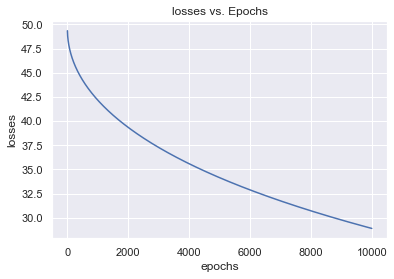

Adagrad -0.6663499812826343


In [254]:
epochs=list(range(len(losses)))
plt.plot(epochs,losses)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.title("losses vs. Epochs")
plt.show()
print("Adagrad",r2_score(Y,allpredictions_adagrad[-1]))


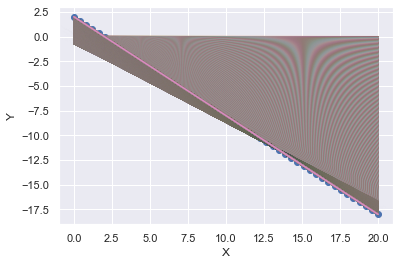

In [250]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

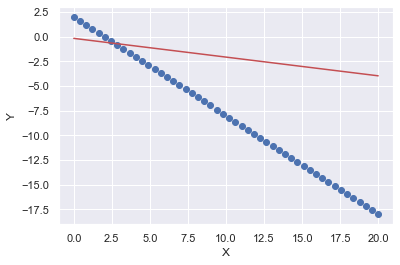

In [262]:
plt.scatter(X,Y)
plt.plot(X,adagrad_pred,color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

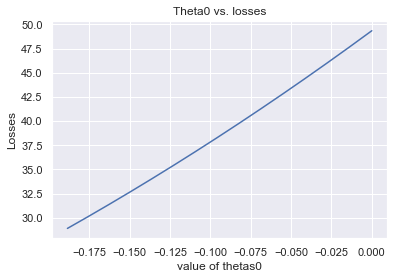

In [252]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title("Theta0 vs. losses")
plt.show()

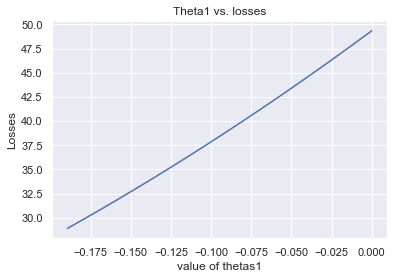

In [253]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title("Theta1 vs. losses")
plt.show()

## RMSProp Fixed Values

In [255]:
thetas0,thetas1,losses,allpredictions_rms,theta0,theta1=RMSProp(X,Y,0.001,10000,1e-3,0.9)
rmsprop_pred=allpredictions_rms[-1]

In [256]:
print("Rmsprop",r2_score(Y,allpredictions_rms[-1]))


Rmsprop 0.9999999884578626


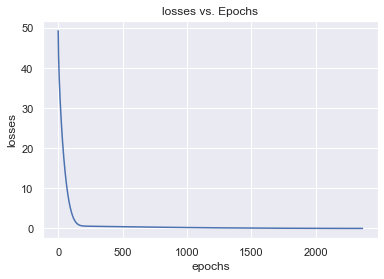

In [257]:
epochs=list(range(len(losses)))
plt.plot(epochs,losses)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.title("losses vs. Epochs")
plt.show()

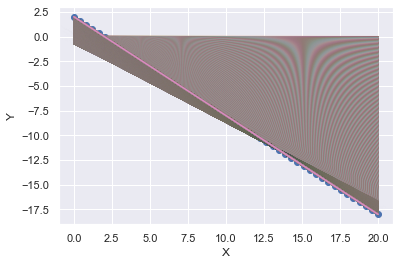

In [258]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

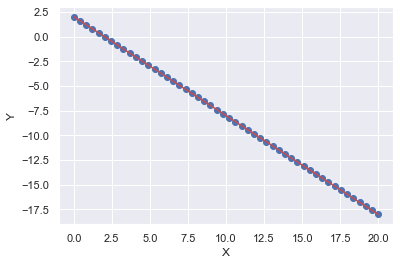

In [263]:
plt.scatter(X,Y)
plt.plot(X,rmsprop_pred,color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

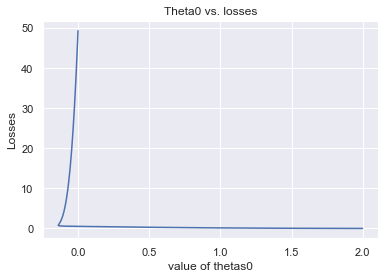

In [260]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title("Theta0 vs. losses")
plt.show()

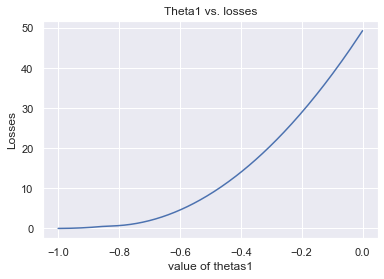

In [261]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title("Theta1 vs. losses")
plt.show()

## Adam Fixed Values

In [264]:
thetas0,thetas1,losses,allpredictions_adam,theta0,theta1=ADAM(X,Y,0.001,10000,1e-3,0.9,0.999)
adam_pred=allpredictions_adam[-1]

In [265]:
print("Adam",r2_score(Y,allpredictions_adam[-1]))

Adam 0.9934174390795498


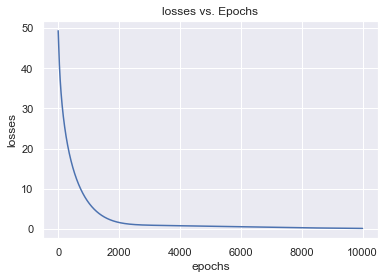

In [266]:
epochs=list(range(len(losses)))
plt.plot(epochs,losses)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.title("losses vs. Epochs")
plt.show()

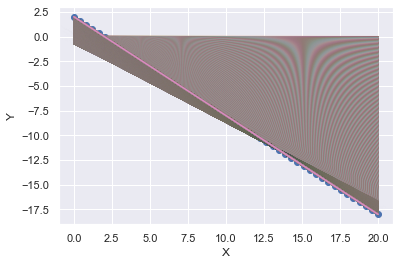

In [267]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

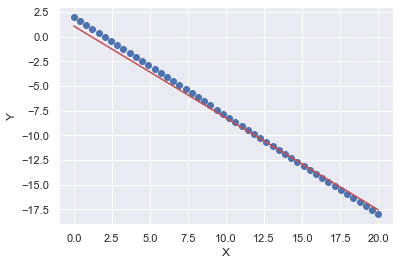

In [268]:
plt.scatter(X,Y)
plt.plot(X,adam_pred,color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

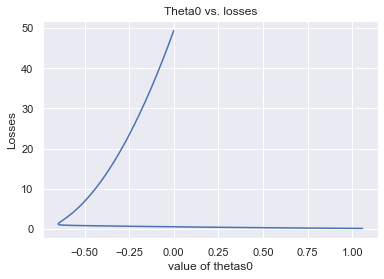

In [269]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title("Theta0 vs. losses")
plt.show()

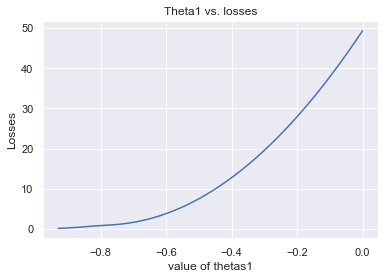

In [270]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title("Theta1 vs. losses")
plt.show()

# Ploting ADAGRAD, RMSProp and ADAM

### Using the same values for alpha, iterations, beta and beta2 and notice the difference

In [271]:
thetas0,thetas1,losses,allpredictions_adagrad,theta0,theta1=Adagrad(X,Y,0.001,10000,1e-3)
adagrad_pred=allpredictions_adagrad[-1]

In [272]:
thetas0,thetas1,losses,allpredictions_rms,theta0,theta1=RMSProp(X,Y,0.001,10000,1e-3,0.9)
rmsprop_pred=allpredictions_rms[-1]

In [273]:
thetas0,thetas1,losses,allpredictions_adam,theta0,theta1=ADAM(X,Y,0.001,10000,1e-3,0.9,0.999)
adam_pred=allpredictions_adam[-1]

R2_score: 
Adagrad -0.6663499812826343
Rmsprop 0.9999999884578626
Adam 0.9934174390795498


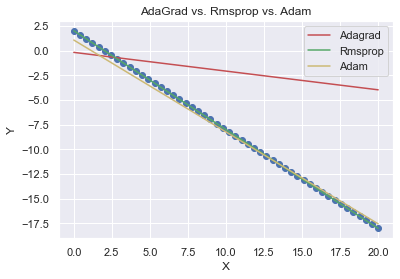

In [274]:
plt.scatter(X,Y)
plt.plot(X,adagrad_pred,color='r')
plt.plot(X,rmsprop_pred,color='g')
plt.plot(X,adam_pred,color='y')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["Adagrad","Rmsprop","Adam"])
plt.title("AdaGrad vs. Rmsprop vs. Adam");
print("R2_score: ")
print("Adagrad",r2_score(Y,allpredictions_adagrad[-1]))
print("Rmsprop",r2_score(Y,allpredictions_rms[-1]))
print("Adam",r2_score(Y,allpredictions_adam[-1]))

## We Notice that the 3 algorithms will have different R2_Value when setting the same alpha and we notice that for Adagrad the optimal prediction value is not good as when the alpha value was 0.1 so the accuracy for the 3 algorithms depends a lot on the alpha, beta1 and beta 2 parameters

## Congratulations I would like to thank you so much Dr. Hatem for your great efforts with us (One of the best professors I've ever met)
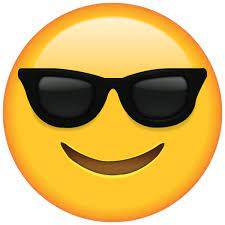